In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

# Set the image dimensions
img_width, img_height = 299, 299

# Load the pre-trained model
loaded_model = tf.keras.models.load_model('D:\\brain_tumor_trained_model.h5')




1/1 [==============================] - 0s 122ms/step


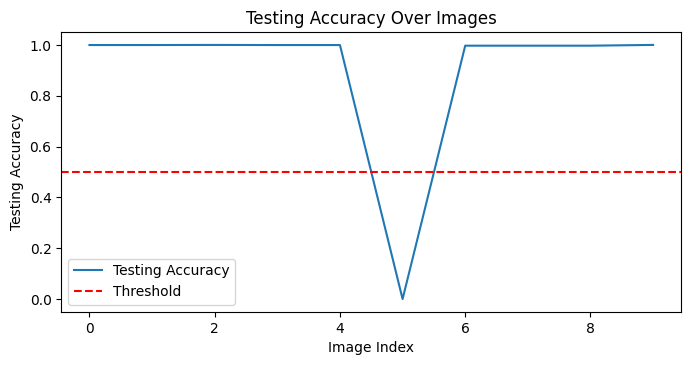

In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import tkinter as tk
from tkinter import filedialog, ttk
from PIL import Image, ImageTk

# Set the image dimensions
img_width, img_height = 299, 299

# Load the pre-trained model
loaded_model = tf.keras.models.load_model('D:\\brain_tumor_trained_model.h5')
# Function to preprocess the image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) * 1. / 255
    return img_array

# Function to make predictions
def predict(image_path):
    img_array = preprocess_image(image_path)
    prediction = loaded_model.predict(img_array)
    testing_value = prediction[0, 0]  # Assuming it's a single-value prediction
    return testing_value

# Function to calculate prediction result
def calculate_result(testing_value, threshold=0.5):
    return "Positive Tumor" if testing_value >= threshold else "Negative Tumor"

# Function to analyze a folder with multiple images
def analyze_folder(folder_path):
    positive_count = 0
    negative_count = 0
    testing_values = []

    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(folder_path, file_name)
            testing_value = predict(file_path)
            testing_values.append(testing_value)

            if testing_value >= 0.5:
                positive_count += 1
            else:
                negative_count += 1

    return positive_count, negative_count, testing_values

# Function to handle the "Browse Folder" button click event
def browse_folder():
    folder_path = filedialog.askdirectory()
    if folder_path:
        positive_count, negative_count, testing_values = analyze_folder(folder_path)
        total_images = positive_count + negative_count
        
        # Print overall testing accuracy
        result_label.config(text=f'Positive Predictions: {positive_count}\nNegative Predictions: {negative_count}\n'
                                  f'Overall Testing Result: {testing_values}')

        # Plot testing accuracy in GUI
        plot_accuracy(testing_values)

# Function to plot testing accuracy
def plot_accuracy(testing_values):
    fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
    ax.plot(testing_values, label='Testing Accuracy')
    ax.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
    ax.set_title('Testing Accuracy Over Images')
    ax.set_xlabel('Image Index').
    ax.set_ylabel('Testing Accuracy')
    ax.legend()

    # Embed the matplotlib plot in the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Create the main window
window = tk.Tk()
window.title("Brain Tumor Detection")
window.geometry("800x600")  # Set a larger window size

# Create and configure themed widgets
style = ttk.Style()

# Set a custom style for the buttons with rounded edges and a blue background
style.configure("TButton",
                padding=10,
                font=('Helvetica', 12),
                background='#3498db',  # Blue background
                borderwidth=5,
                relief="flat",  # Flat relief for a modern look
                bordercolor='#2980b9',  # Border color
                focuscolor='#3498db')  # Focus color

# Create and configure widgets with themed style
browse_button = ttk.Button(window, text="Browse Folder", command=browse_folder, style="TButton")
browse_button.pack(pady=20)  # Increase vertical padding

image_label = tk.Label(window)
image_label.pack()

result_label = tk.Label(window, text="Prediction: ", font=('Helvetica', 14), background='#4CAF50', foreground='white', padx=10, pady=10)
result_label.pack(pady=20)  # Increase vertical padding

# Run the themed GUI main loop
window.mainloop()
